Housing data set for IA state.
To predict if for a given housing property to be invetsed what factors are taken into consideration by the investor while buying.

 Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', -1)
from sklearn import preprocessing
import seaborn as seabornInstance 
from sklearn.preprocessing import LabelEncoder, RobustScaler
import pickle

import requests
from bs4 import BeautifulSoup
import json
import time
import csv

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
%matplotlib inline
%load_ext google.colab.data_table

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score, f1_score

from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import calibration_curve

import seaborn as sns; sns.set()
from skopt import BayesSearchCV
import mlxtend.evaluate
from mlxtend.evaluate import bias_variance_decomp
CV_N_REPEATS = 20
BINS = 10


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [ ]:
!pip install xgboost

In [ ]:
!pip install scikit-optimize

In [ ]:
!pip install mlxtend --upgrade

In [ ]:
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import calibration_curve
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns; sns.set()
from skopt import BayesSearchCV
import mlxtend.evaluate
from mlxtend.evaluate import bias_variance_decomp
CV_N_REPEATS = 20
BINS = 10

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Read the housing data set file provided. 

In [ ]:

path = "/content/gdrive/MyDrive/data/Dataset_Realestate_CA_NY_IA_TX.csv"
df = pd.read_csv(path)
df.head(5)

rank  ...                               listing_url
0  784   ...  https://www.zillow.com/homes/TX_rb/20_p/
1  48    ...  https://www.zillow.com/homes/IA_rb/2_p/ 
2  12    ...  https://www.zillow.com/homes/TX_rb/     
3  325   ...  https://www.zillow.com/homes/NY_rb/9_p/ 
4  365   ...  https://www.zillow.com/homes/IA_rb/10_p/

[5 rows x 22 columns]

The data set contains the housing data for all various US States.
I was assigned the data set for the IA state.
Below is the code to filter the data for only IA state.

In [ ]:
#filter IOWA state data
def get_state_data(base_data_set, state_code):
    return base_data_set[base_data_set['address'].str.contains(state_code.upper())]

#this is the dataframe for IA state going forward
df = get_state_data(df, 'IA')

#print info
df.head(2)
print(df.shape)
print(df.info())

(757, 22)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 1 to 2398
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             757 non-null    int64  
 1   property_id      757 non-null    int64  
 2   address          757 non-null    object 
 3   latitude         721 non-null    float64
 4   longitude        721 non-null    float64
 5   price            752 non-null    float64
 6   currency         757 non-null    object 
 7   bathrooms        687 non-null    float64
 8   bedrooms         718 non-null    float64
 9   area             695 non-null    object 
 10  land_area        66 non-null     object 
 11  zestimate        459 non-null    float64
 12  rent_zestimate   482 non-null    float64
 13  days_on_zillow   756 non-null    float64
 14  sold_date        0 non-null      float64
 15  is_zillow_owned  757 non-null    bool   
 16  image            757 non-null    object 
 17  listi

#Data Cleaning
Cleaning the Data set which contains null values

In [ ]:
print(df.isnull().sum()) 
print(df.isnull().mean())


def find_irrelevant_cols(data):
    col_null_sum = df.isnull().sum().to_list()
    df.isnull().mean()
    for (i,j) in col_null_mean:
        if j > 0.7:
          print(i)

rank               0  
property_id        0  
address            0  
latitude           36 
longitude          36 
price              5  
currency           0  
bathrooms          70 
bedrooms           39 
area               62 
land_area          691
zestimate          298
rent_zestimate     275
days_on_zillow     1  
sold_date          757
is_zillow_owned    0  
image              0  
listing_type       0  
broker_name        131
input              0  
property_url       0  
listing_url        0  
dtype: int64
rank               0.000000
property_id        0.000000
address            0.000000
latitude           0.047556
longitude          0.047556
price              0.006605
currency           0.000000
bathrooms          0.092470
bedrooms           0.051519
area               0.081902
land_area          0.912814
zestimate          0.393659
rent_zestimate     0.363276
days_on_zillow     0.001321
sold_date          1.000000
is_zillow_owned    0.000000
image              0.000000
listi

Drop the columns which are not necessary.

In [ ]:
df.drop(['currency','property_id', 'rank','land_area', 'sold_date', 'days_on_zillow', 'broker_name', 'image', 'is_zillow_owned'], axis=1, inplace=True)
df.shape

(757, 13)

 Dropping the rows with null values

In [ ]:
[df['latitude'][df["latitude"].isnull()!=0].index]
df = df.dropna(subset=['latitude','longitude', 'price', 'bedrooms', 'area', 'bathrooms'])
df.shape

(657, 13)

#Feature Transformation 
Extract zipcode from address columns of data set.

In [ ]:

df['address'].apply(lambda x:x[-5:])
df['zipcode']=df['address'].apply(lambda x:x[-5:])

In [ ]:
len(df['zipcode'].unique())

229

Converting the necessary columns to uniform data type.  

In [ ]:
df['area'] = df['area'].apply(lambda a: (str(a).replace("sqft", ""))).astype(float)

In [ ]:
#Use price as zestimate for listings not showing zestimate
df.zestimate.fillna(df.price, inplace=True)

In [ ]:
df.isnull().sum()

address           0  
latitude          0  
longitude         0  
price             0  
bathrooms         0  
bedrooms          0  
area              0  
zestimate         0  
rent_zestimate    186
listing_type      0  
input             0  
property_url      0  
listing_url       0  
zipcode           0  
dtype: int64

In [ ]:
df['rent_zestimate'].fillna((df['rent_zestimate'].mean()), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 1 to 2398
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   address         657 non-null    object 
 1   latitude        657 non-null    float64
 2   longitude       657 non-null    float64
 3   price           657 non-null    float64
 4   bathrooms       657 non-null    float64
 5   bedrooms        657 non-null    float64
 6   area            657 non-null    float64
 7   zestimate       657 non-null    float64
 8   rent_zestimate  657 non-null    float64
 9   listing_type    657 non-null    object 
 10  input           657 non-null    object 
 11  property_url    657 non-null    object 
 12  listing_url     657 non-null    object 
 13  zipcode         657 non-null    object 
dtypes: float64(8), object(6)
memory usage: 77.0+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 1 to 2398
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   address         657 non-null    object 
 1   latitude        657 non-null    float64
 2   longitude       657 non-null    float64
 3   price           657 non-null    float64
 4   bathrooms       657 non-null    float64
 5   bedrooms        657 non-null    float64
 6   area            657 non-null    float64
 7   zestimate       657 non-null    float64
 8   rent_zestimate  657 non-null    float64
 9   listing_type    657 non-null    object 
 10  input           657 non-null    object 
 11  property_url    657 non-null    object 
 12  listing_url     657 non-null    object 
 13  zipcode         657 non-null    object 
dtypes: float64(8), object(6)
memory usage: 77.0+ KB


# Web Scraping
Scraping the data from the zillow website to fetch other features.

In [ ]:
df_scrap = pd.read_csv("/content/gdrive/MyDrive/data/scraped_data.csv")
df = pd.merge(left=df, right=df_scrap, how='left', left_on='address', right_on='address')

df.head()
df.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 0 to 656
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      657 non-null    object 
 1   latitude                     657 non-null    float64
 2   longitude                    657 non-null    float64
 3   price                        657 non-null    float64
 4   bathrooms                    657 non-null    float64
 5   bedrooms                     657 non-null    float64
 6   area                         657 non-null    float64
 7   zestimate                    657 non-null    float64
 8   rent_zestimate               657 non-null    float64
 9   listing_type                 657 non-null    object 
 10  input                        657 non-null    object 
 11  property_url                 657 non-null    object 
 12  listing_url                  657 non-null    object 
 13  zipcode             

In [ ]:

df = df[['zipcode', 'bedrooms', 'bathrooms', 'area', 'price', 'zestimate', 'rent_zestimate', 'HOAHOA', 'Walk Score', 'School Rank', 'Violent Crime', 'Property Crime', 'Mortgage fees per month']]
print(df.isnull().sum()) #features having the null value
print(df.isnull().mean())
def find_irrelevant_cols(df):
  col_null_sum = df.isnull().sum().to_list()
  df.isnull().mean()
  for (i,j) in col_null_mean:
    if j > 0.7:
      print(i)


zipcode                    0  
bedrooms                   0  
bathrooms                  0  
area                       0  
price                      0  
zestimate                  0  
rent_zestimate             0  
HOAHOA                     615
Walk Score                 254
School Rank                331
Violent Crime              416
Property Crime             416
Mortgage fees per month    294
dtype: int64
zipcode                    0.000000
bedrooms                   0.000000
bathrooms                  0.000000
area                       0.000000
price                      0.000000
zestimate                  0.000000
rent_zestimate             0.000000
HOAHOA                     0.936073
Walk Score                 0.386606
School Rank                0.503805
Violent Crime              0.633181
Property Crime             0.633181
Mortgage fees per month    0.447489
dtype: float64


##Perform Data Cleaning over the new features

In [ ]:
df['Walk Score'] = df['Walk Score'].astype(float)
df['zipcode'] = df['zipcode'].astype(float)

df['HOAHOA'].fillna((df['HOAHOA'].mean()), inplace=True)
df['Walk Score'].fillna((df['Walk Score'].mean()), inplace=True)
df['School Rank'].fillna((df['School Rank'].mean()), inplace=True)
df['Violent Crime'].fillna((df['Violent Crime'].mean()), inplace=True)
df['Property Crime'].fillna((df['Property Crime'].mean()), inplace=True)
df['Mortgage fees per month'].fillna((df['Mortgage fees per month'].mean()), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 0 to 656
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   zipcode                  657 non-null    float64
 1   bedrooms                 657 non-null    float64
 2   bathrooms                657 non-null    float64
 3   area                     657 non-null    float64
 4   price                    657 non-null    float64
 5   zestimate                657 non-null    float64
 6   rent_zestimate           657 non-null    float64
 7   HOAHOA                   657 non-null    float64
 8   Walk Score               657 non-null    float64
 9   School Rank              657 non-null    float64
 10  Violent Crime            657 non-null    float64
 11  Property Crime           657 non-null    float64
 12  Mortgage fees per month  657 non-null    float64
dtypes: float64(13)
memory usage: 71.9 KB


In [ ]:
df['Mortgage+HOA'] = df['Mortgage fees per month']+df['HOAHOA']
df['Profit'] =  df['rent_zestimate'] - df['Mortgage+HOA']
df= df.drop(['HOAHOA','Mortgage fees per month'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 0 to 656
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   zipcode         657 non-null    float64
 1   bedrooms        657 non-null    float64
 2   bathrooms       657 non-null    float64
 3   area            657 non-null    float64
 4   price           657 non-null    float64
 5   zestimate       657 non-null    float64
 6   rent_zestimate  657 non-null    float64
 7   Walk Score      657 non-null    float64
 8   School Rank     657 non-null    float64
 9   Violent Crime   657 non-null    float64
 10  Property Crime  657 non-null    float64
 11  Mortgage+HOA    657 non-null    float64
 12  Profit          657 non-null    float64
dtypes: float64(13)
memory usage: 71.9 KB


# Data Amalgamation (walk score, hoa , school rank, morgage fees , crime rate) from webscraping.


In [ ]:
final_df = df

# Visualization and Feature Engineering


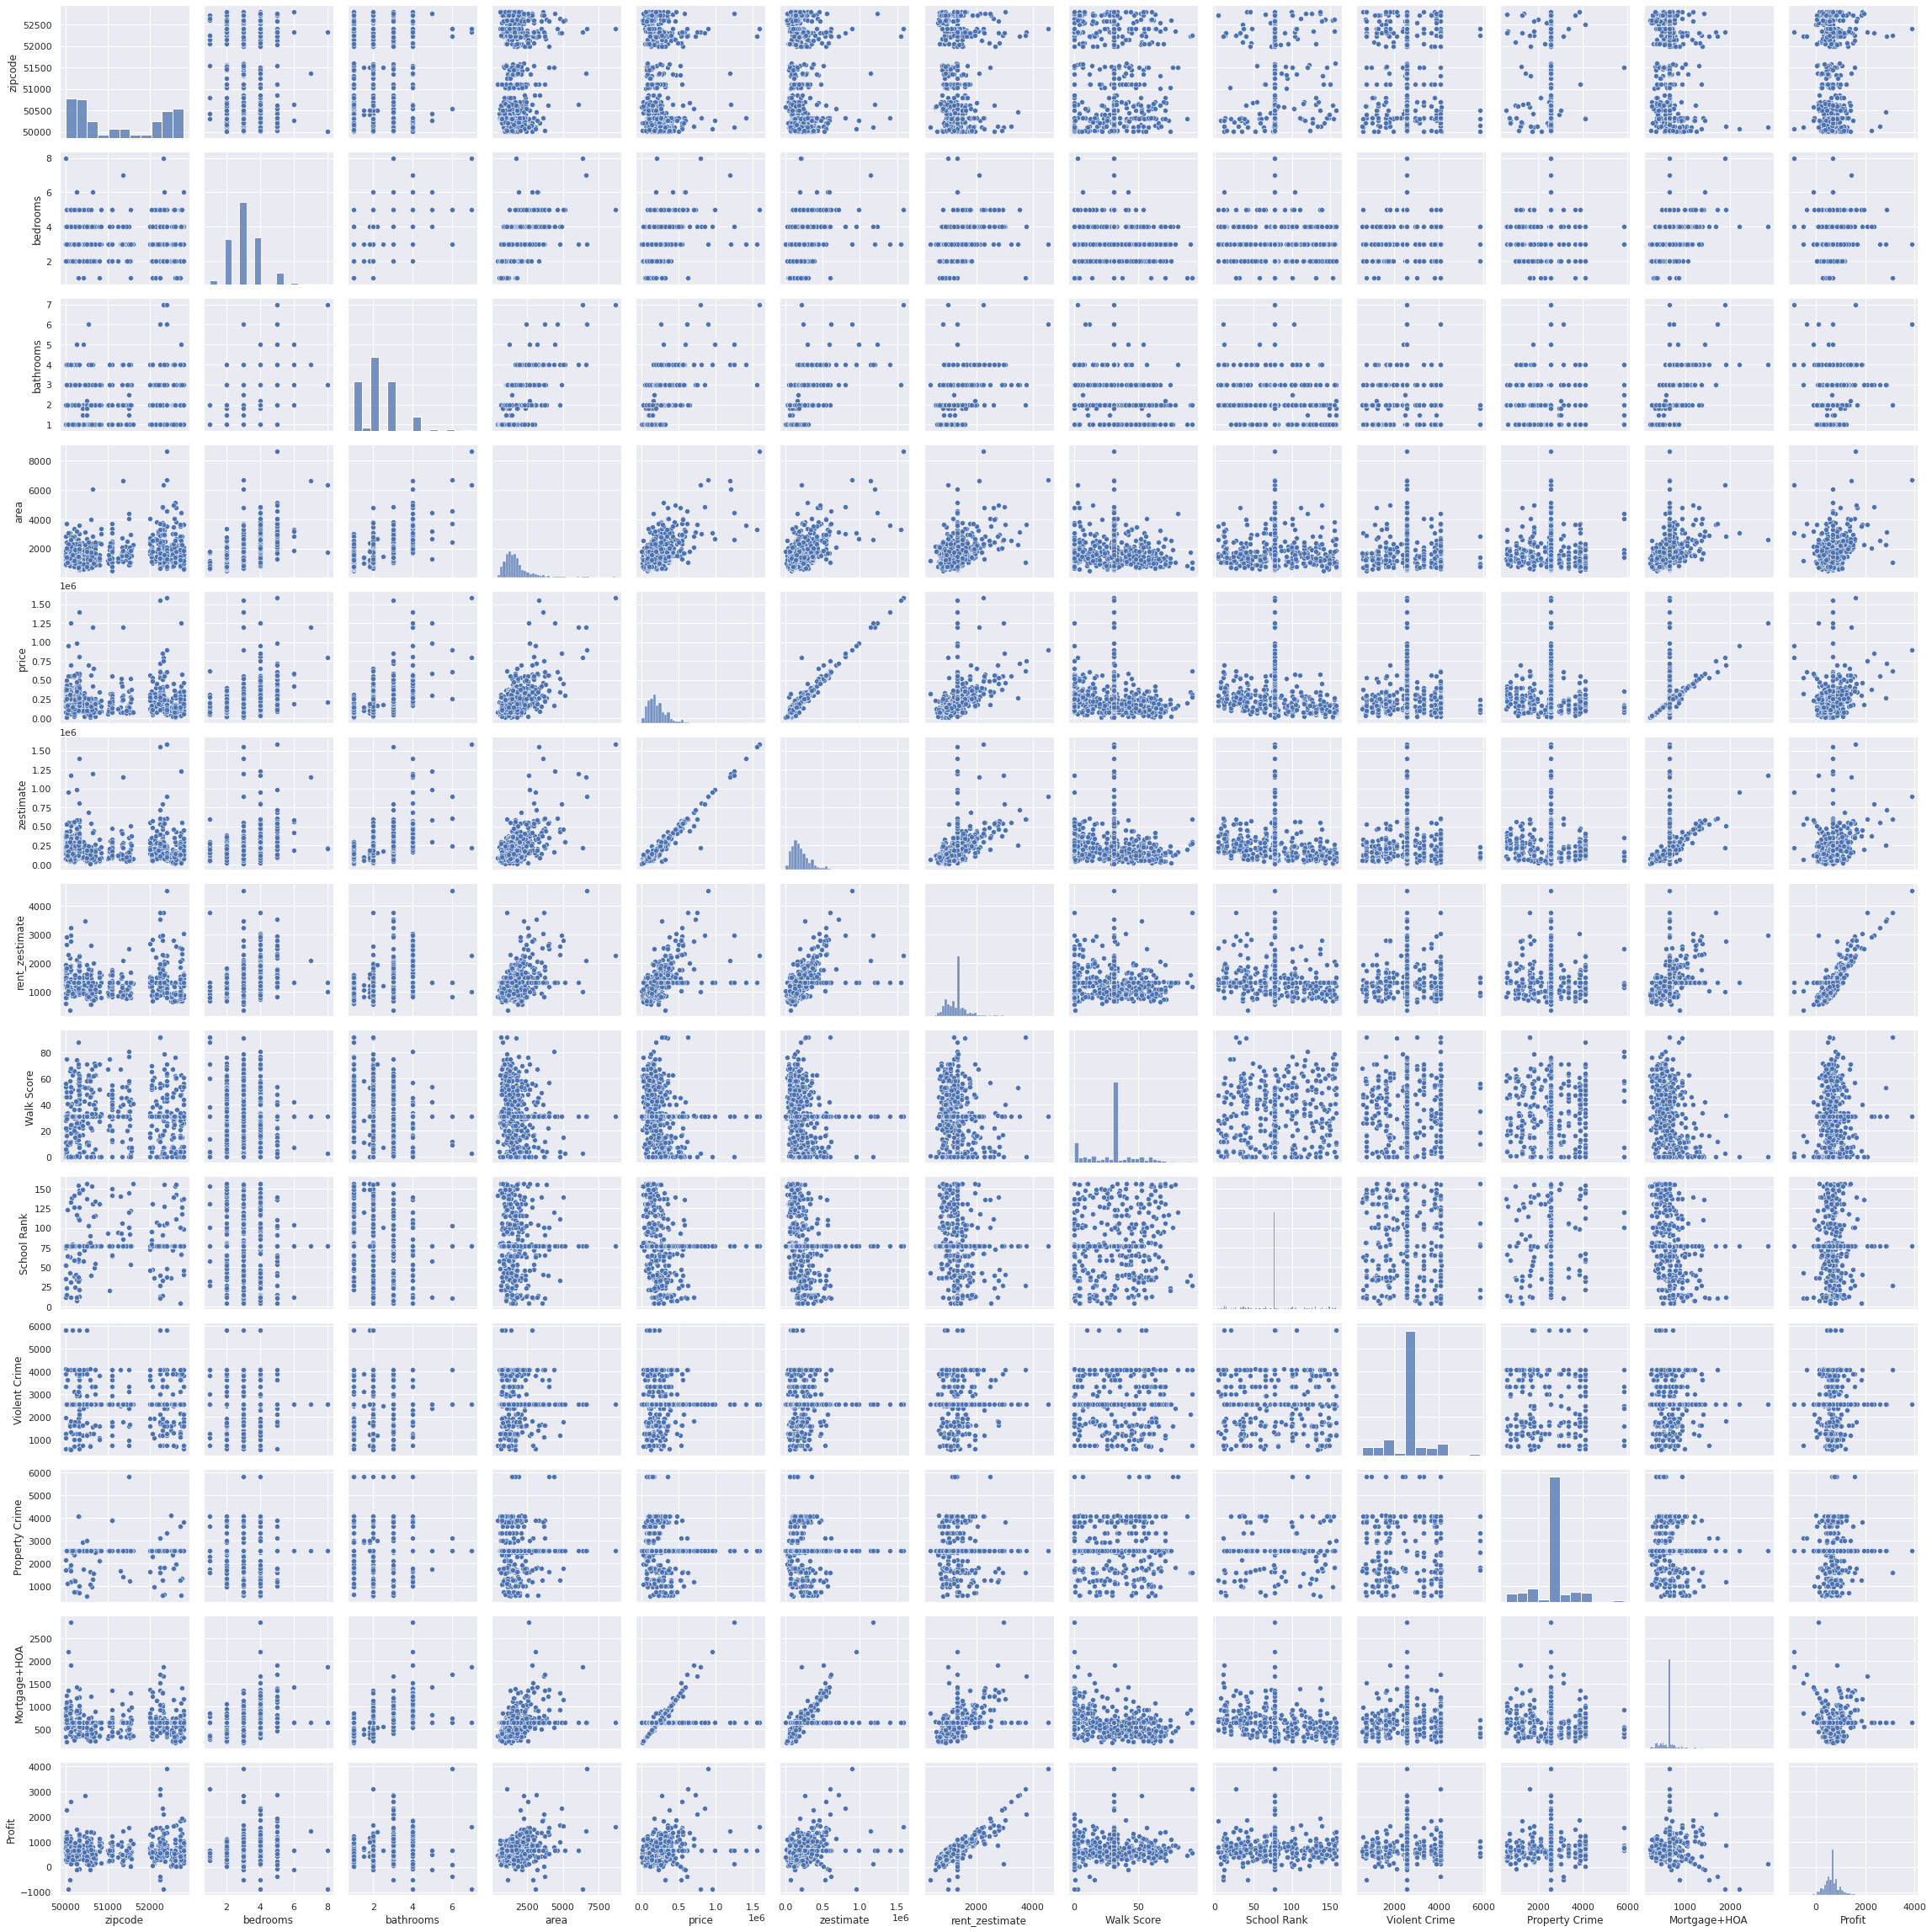

In [ ]:
sns.set()
sns.pairplot(final_df, height = 2.5)
plt.show();

## Correlation Coefficients Heatmap

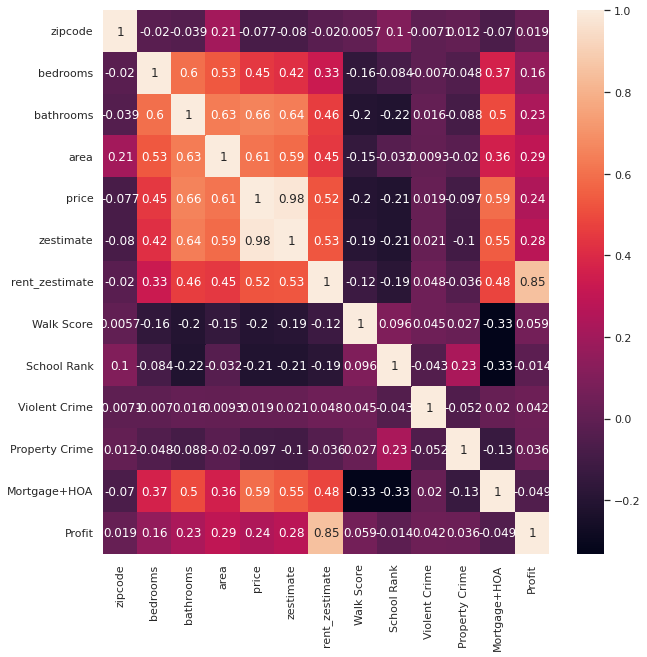

In [ ]:
correlation_matrix = final_df.corr()
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)

## Feature Importance

In [ ]:
y = final_df['price']

[0.09439404 0.0559884  0.04814514 0.09694412 0.14867826 0.12553574
 0.08211601 0.0591397  0.05404945 0.04188702 0.03887023 0.07067689
 0.08357501]


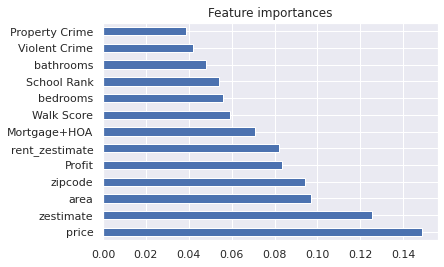

In [ ]:
model = ExtraTreesClassifier(criterion='gini') 
model.fit(final_df, y)
print(model.feature_importances_) 
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=final_df.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Feature importances")
plt.show()

Based on the Gini Importance of the features-
  * price,
  * Mortgage+HOA
  * area
  * zestimate 
  * zipcode 

  Are the most important features.

# Perform K-Means Clustering

## Price on ZipCode

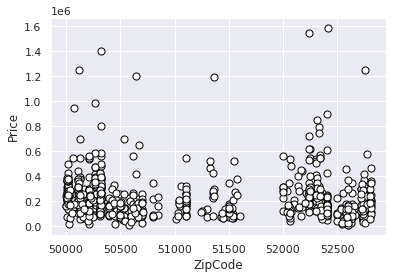

In [ ]:
x = final_df.iloc[:,[0,4]].values
plt.scatter(
   x[:, 0], x[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.xlabel('ZipCode')
plt.ylabel('Price')
plt.show()

 Elbow method: calculate distortion for a range of number of cluster

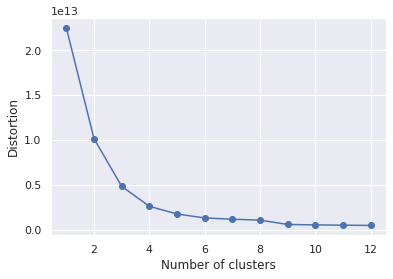

In [ ]:
distortions = []
for i in range(1, 13):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 13), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Apply K-Means algorithm

In [ ]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(x)

 plot the 3 clusters

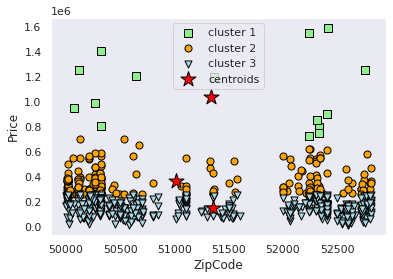

In [ ]:

plt.scatter(
    x[y_km == 0, 0], x[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x[y_km == 1, 0], x[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x[y_km == 2, 0], x[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.xlabel('ZipCode')
plt.ylabel('Price')
plt.show()

## Rent on Zestimate

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 0 to 656
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   zipcode         657 non-null    float64
 1   bedrooms        657 non-null    float64
 2   bathrooms       657 non-null    float64
 3   area            657 non-null    float64
 4   price           657 non-null    float64
 5   zestimate       657 non-null    float64
 6   rent_zestimate  657 non-null    float64
 7   Walk Score      657 non-null    float64
 8   School Rank     657 non-null    float64
 9   Violent Crime   657 non-null    float64
 10  Property Crime  657 non-null    float64
 11  Mortgage+HOA    657 non-null    float64
 12  Profit          657 non-null    float64
dtypes: float64(13)
memory usage: 71.9 KB


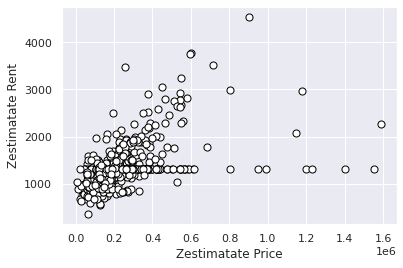

In [ ]:
x = final_df.iloc[:,[5,6]].values
plt.scatter(
   x[:, 0], x[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.xlabel('Zestimatate Price')
plt.ylabel('Zestimatate Rent')
plt.show()

 Elbow method: calculate distortion for a range of number of cluster

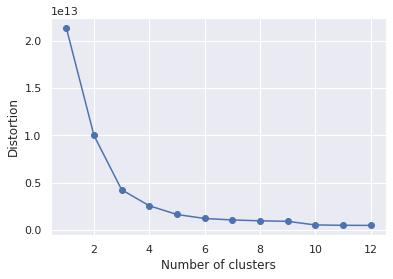

In [ ]:
distortions = []
for i in range(1, 13):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 13), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Apply K-Means algorithm

In [ ]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(x)

 plot the 3 clusters

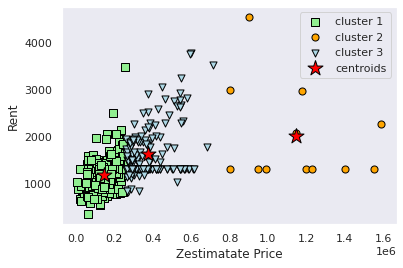

In [ ]:

plt.scatter(
    x[y_km == 0, 0], x[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x[y_km == 1, 0], x[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x[y_km == 2, 0], x[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.xlabel('Zestimatate Price')
plt.ylabel('Rent')
plt.show()

## School Rank and Zestimate

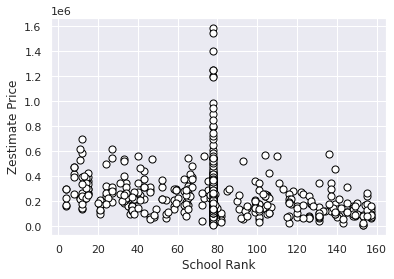

In [ ]:
x = final_df.iloc[:,[8,4]].values
plt.scatter(
   x[:, 0], x[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.xlabel('School Rank')
plt.ylabel('Zestimate Price')
plt.show()

 Elbow method: calculate distortion for a range of number of cluster

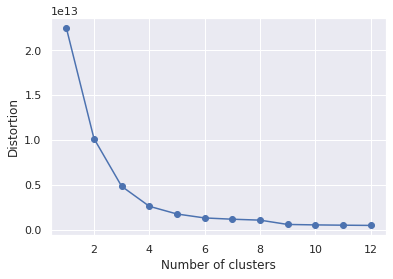

In [ ]:
distortions = []
for i in range(1, 13):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 13), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Apply K-Means algorithm

In [ ]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(x)

 plot the 3 clusters

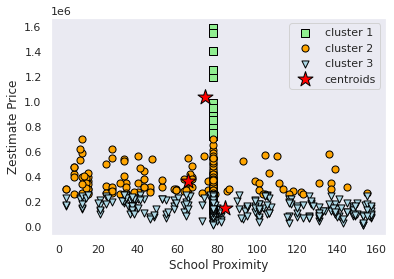

In [ ]:

plt.scatter(
    x[y_km == 0, 0], x[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x[y_km == 1, 0], x[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x[y_km == 2, 0], x[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.xlabel('School Proximity')
plt.ylabel('Zestimate Price')
plt.show()

## Violent Crime and Zestimate

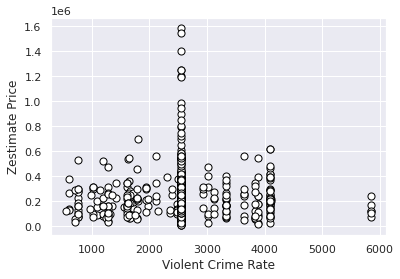

In [ ]:
x = final_df.iloc[:,[9,4]].values
plt.scatter(
   x[:, 0], x[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.xlabel('Violent Crime Rate')
plt.ylabel('Zestimate Price')
plt.show()

 Elbow method: calculate distortion for a range of number of cluster

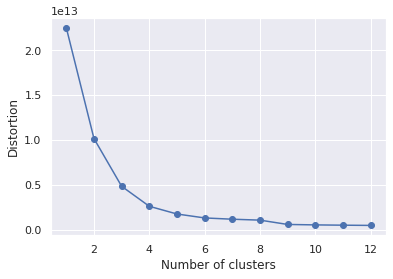

In [ ]:
distortions = []
for i in range(1, 13):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 13), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Apply K-Means algorithm

In [ ]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(x)

 plot the 3 clusters

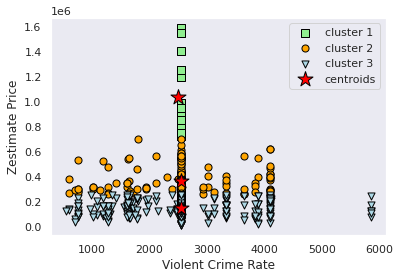

In [ ]:

plt.scatter(
    x[y_km == 0, 0], x[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x[y_km == 1, 0], x[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x[y_km == 2, 0], x[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.xlabel('Violent Crime Rate')
plt.ylabel('Zestimate Price')
plt.show()

# Linear Regression

## Train and Split data

In [ ]:
X = final_df[['price', 'bathrooms', 'bedrooms', 'area', 'rent_zestimate', 'zipcode']]
print(X.columns)

Index(['price', 'bathrooms', 'bedrooms', 'area', 'rent_zestimate', 'zipcode'], dtype='object')


Checking the average value of the 'Price' column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


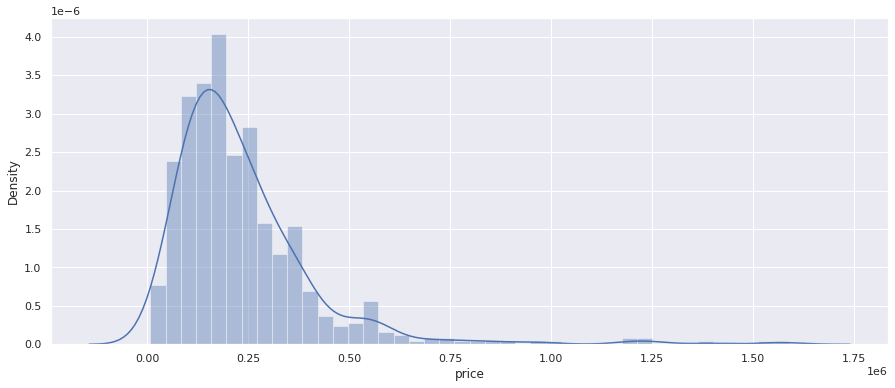

In [ ]:
plt.figure(figsize=(15,6))
plt.tight_layout()
seabornInstance.distplot(y)

 Splitting 80% of the data to the training set while 20% of the data to test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Training the model

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 Coefficients our regression model :

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

Coefficient
price           1.000000e+00
bathrooms      -8.155188e-13
bedrooms       -1.898800e-12
area            4.108468e-15
rent_zestimate -4.682446e-16
zipcode        -4.395504e-17

Prediction on test data :

In [ ]:
y_pred = regressor.predict(X_test)

Difference between the actual value and predicted value :

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(40)
df1.head(30)

Actual  Predicted
538  125000.0  125000.0 
493  94900.0   94900.0  
14   142900.0  142900.0 
247  195000.0  195000.0 
85   419900.0  419900.0 
127  20000.0   20000.0  
301  179000.0  179000.0 
532  149900.0  149900.0 
331  74900.0   74900.0  
484  299900.0  299900.0 
175  119000.0  119000.0 
294  192500.0  192500.0 
334  175000.0  175000.0 
526  25900.0   25900.0  
477  350000.0  350000.0 
586  249900.0  249900.0 
205  191000.0  191000.0 
170  265000.0  265000.0 
428  179900.0  179900.0 
157  139900.0  139900.0 
401  130000.0  130000.0 
249  22000.0   22000.0  
303  215000.0  215000.0 
405  97500.0   97500.0  
250  159950.0  159950.0 
327  425000.0  425000.0 
451  185000.0  185000.0 
50   125000.0  125000.0 
103  379900.0  379900.0 
367  39900.0   39900.0

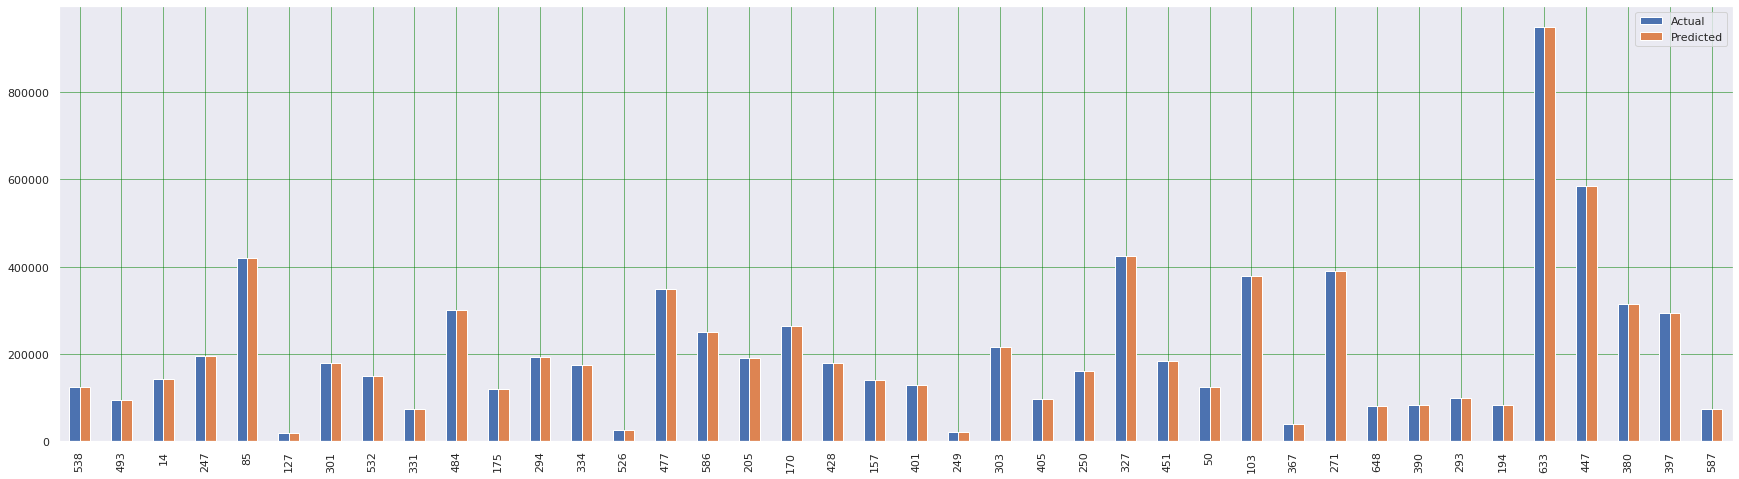

In [ ]:
df1.plot(kind='bar',figsize=(30,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
regressor.score(X, y) 

1.0

In [ ]:
r2_score(y_test, y_pred) 

1.0

In [ ]:
mean_squared_error(y_test, y_pred) 

4.756378760064915e-21

Evaluate the performance of the algorithm. We’ll do this by finding the values for Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error:

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.362160278089119e-11
Mean Squared Error: 4.756378760064915e-21
Root Mean Squared Error: 6.896650462409209e-11


# Fractal Clustering on Latent Variables

## Rent vs Mortgage+HOA

In [ ]:
Fractal_df = final_df

In [ ]:
Fractal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 0 to 656
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   zipcode         657 non-null    float64
 1   bedrooms        657 non-null    float64
 2   bathrooms       657 non-null    float64
 3   area            657 non-null    float64
 4   price           657 non-null    float64
 5   zestimate       657 non-null    float64
 6   rent_zestimate  657 non-null    float64
 7   Walk Score      657 non-null    float64
 8   School Rank     657 non-null    float64
 9   Violent Crime   657 non-null    float64
 10  Property Crime  657 non-null    float64
 11  Mortgage+HOA    657 non-null    float64
 12  Profit          657 non-null    float64
dtypes: float64(13)
memory usage: 71.9 KB


In [ ]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,[10,9]]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

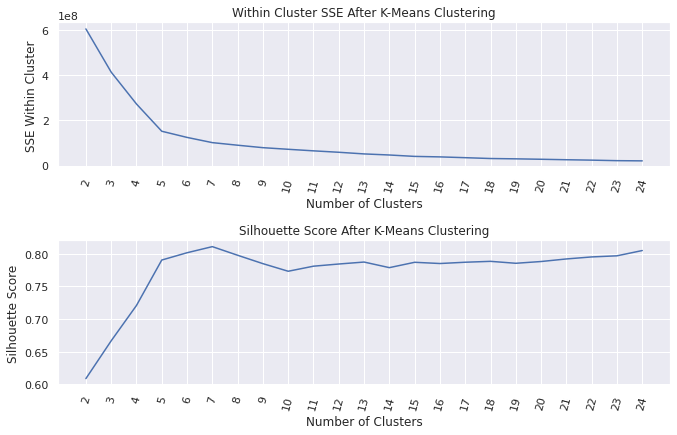

In [ ]:
plot_cluster(Fractal_df, max_loop=25)



### First trial With 2 clusters

In [ ]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,[11,6]]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10, n_jobs=-1)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster.round()))
    
    return df

In [ ]:
first_trial = apply_cluster(Fractal_df, clusters=2)

clustering performance
-----------------------------------
silhouette score: 0.7
sse withing cluster: 2449.0


In [ ]:

cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"rent_zestimate":"mean", "Mortgage+HOA":"mean"})
    .sort_values('rent_zestimate')
    .reset_index()
)

cluster_perf_df

cluster  rent_zestimate  Mortgage+HOA
0  0        1274.43596      600.362373  
1  1        1979.39832      1281.923913

Choose cluster 0 for fractal clustering as it has maximum profit in terms of (Rent > Mortgage+HOA)

In [ ]:
df_sub = Fractal_df.query("cluster == 0").reset_index(drop=True)

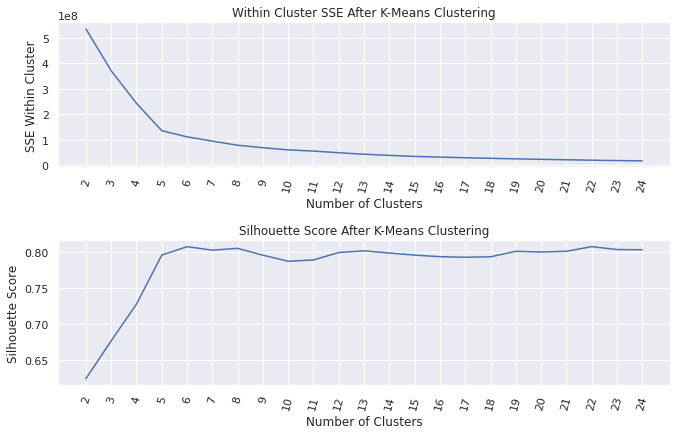

In [ ]:
plot_cluster(df_sub, max_loop=25)

### Second trial with 8 clusters

In [ ]:
second_trial= apply_cluster(df_sub, clusters=8)

clustering performance
-----------------------------------
silhouette score: 0.5
sse withing cluster: 205.0


In [ ]:
sub_cluster_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({"rent_zestimate":"mean", "Mortgage+HOA":"mean"})
    .sort_values('rent_zestimate')
    .reset_index()
)

sub_cluster_perf_df

cluster  rent_zestimate  Mortgage+HOA
0  1        854.015152      354.726190  
1  3        902.428571      657.013577  
2  6        1128.619958     511.776316  
3  7        1266.160555     369.944015  
4  0        1329.915588     653.599348  
5  5        1432.319704     868.776498  
6  4        1826.712121     677.129172  
7  2        3489.142857     648.082054

### Golden Cluster

In [ ]:
best_sub_cluster = second_trial.query("cluster == 2")

In [ ]:
best_sub_cluster

zipcode  bedrooms  bathrooms  ...  Mortgage+HOA       Profit  cluster
308  50131.0  3.0       3.0        ...  648.082054    2585.917946  2      
330  52240.0  5.0       3.0        ...  648.082054    2873.917946  2      
331  52403.0  3.0       6.0        ...  648.082054    3889.917946  2      
415  52310.0  4.0       3.0        ...  648.082054    2336.917946  2      
435  52245.0  1.0       2.0        ...  648.082054    3111.917946  2      
483  50459.0  3.0       3.0        ...  648.082054    2832.917946  2      
604  50023.0  4.0       3.0        ...  648.082054    2255.917946  2      

[7 rows x 14 columns]

## House price & best public school proximity

In [ ]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,[4,8]]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

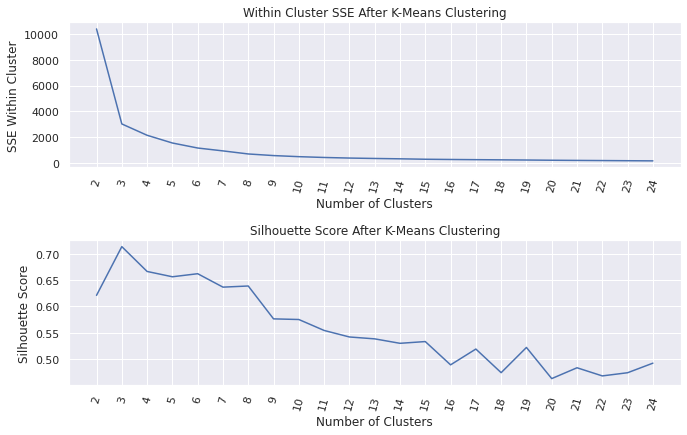

In [ ]:
plot_cluster(final_df, max_loop=25)

In [ ]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,[4,8]]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10, n_jobs=-1)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster.round()))
    
    return df

### First Trial

In [ ]:
first_trial = apply_cluster(final_df, clusters=3)

clustering performance
-----------------------------------
silhouette score: 0.71
sse withing cluster: 3028.0


In [ ]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"School Rank":"mean", "price":"mean"})
    .sort_values('price')
    .reset_index()
)

cluster_perf_df

cluster  School Rank          price
0  1        137.122449   154193.785714
1  0        78.597636    242967.163594
2  2        27.864000    276072.056000

In [ ]:
df_sub = final_df.query("cluster == 0").reset_index(drop=True)
df_sub

zipcode  bedrooms  bathrooms  ...  Mortgage+HOA       Profit  cluster
0    50321.0  4.0       4.0        ...  1021.214286   1260.785714  0      
1    50054.0  4.0       2.0        ...  648.082054    851.917946   0      
2    50595.0  2.0       1.0        ...  355.214286    968.579769   0      
3    52403.0  3.0       2.0        ...  648.082054    658.917946   0      
4    50211.0  4.0       3.0        ...  648.082054    675.712001   0      
..       ...  ...       ...        ...         ...           ...  ..      
429  52404.0  2.0       1.0        ...  414.214286    564.785714   0      
430  52728.0  3.0       1.0        ...  484.214286    415.785714   0      
431  50501.0  3.0       1.8        ...  648.082054    987.917946   0      
432  50166.0  2.0       1.0        ...  648.082054    293.917946   0      
433  52594.0  5.0       4.0        ...  648.082054    533.917946   0      

[434 rows x 14 columns]

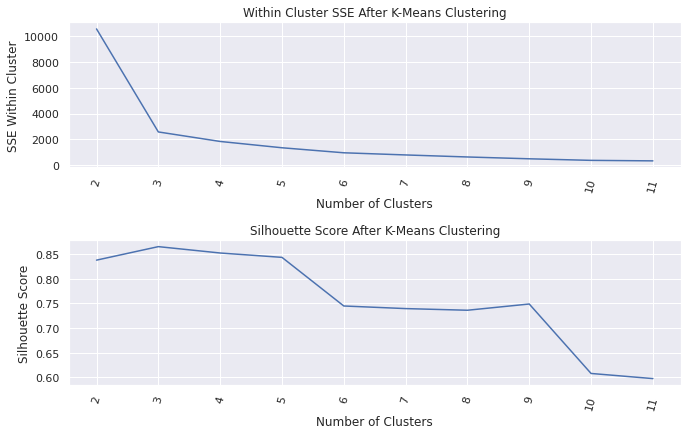

In [ ]:
plot_cluster(df_sub, max_loop=12)

### Second Trial

In [ ]:
second_trial= apply_cluster(df_sub, clusters=3)

clustering performance
-----------------------------------
silhouette score: 0.86
sse withing cluster: 2574.0


In [ ]:
sub_cluster_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({"School Rank":"mean", "price":"mean"})
    .sort_values('price')
    .reset_index()
)

sub_cluster_perf_df

cluster  School Rank          price
0  1        100.046512   192630.232558
1  0        77.701622    248014.949153
2  2        62.243243    253171.810811

In [ ]:
best_sub_cluster = second_trial.query("cluster == 0")
best_sub_cluster

zipcode  bedrooms  bathrooms  ...  Mortgage+HOA       Profit  cluster
1    50054.0  4.0       2.0        ...  648.082054    851.917946   0      
2    50595.0  2.0       1.0        ...  355.214286    968.579769   0      
3    52403.0  3.0       2.0        ...  648.082054    658.917946   0      
4    50211.0  4.0       3.0        ...  648.082054    675.712001   0      
7    52530.0  3.0       1.0        ...  500.214286    429.785714   0      
..       ...  ...       ...        ...         ...           ...  ..      
428  50023.0  4.0       3.0        ...  648.082054    2255.917946  0      
430  52728.0  3.0       1.0        ...  484.214286    415.785714   0      
431  50501.0  3.0       1.8        ...  648.082054    987.917946   0      
432  50166.0  2.0       1.0        ...  648.082054    293.917946   0      
433  52594.0  5.0       4.0        ...  648.082054    533.917946   0      

[354 rows x 14 columns]

## Zestimate and max. walk score

In [ ]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,[5,7]]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

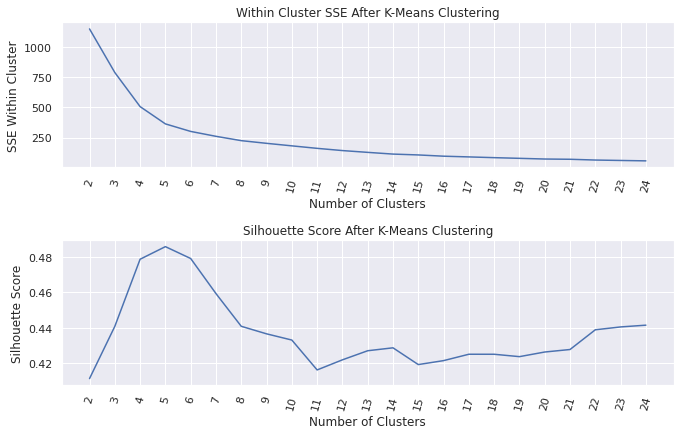

In [ ]:
plot_cluster(final_df, max_loop=25)

In [ ]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,[5,7]]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10, n_jobs=-1)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster.round()))
    
    return df

In [ ]:
first_trial = apply_cluster(final_df, clusters=7)

clustering performance
-----------------------------------
silhouette score: 0.46
sse withing cluster: 260.0


In [ ]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"Walk Score":"mean", "zestimate":"mean"})
    .sort_values('Walk Score')
    .reset_index()
)

cluster_perf_df

cluster  Walk Score     zestimate
0  0        6.110092    1.999480e+05
1  4        6.512821    4.534471e+05
2  3        26.019438   1.144946e+06
3  1        31.076737   1.465954e+05
4  5        33.090794   3.753186e+05
5  2        53.562500   1.404893e+05
6  6        73.257143   1.860785e+05





Selected cluster 1 as it has best walk score with less list price

In [ ]:
df_sub = final_df.query("cluster == 1").reset_index(drop=True)
df_sub

zipcode  bedrooms  bathrooms  ...  Mortgage+HOA       Profit  cluster
0    52060.0  1.0       1.0        ...  283.214286    543.785714   1      
1    50054.0  4.0       2.0        ...  648.082054    851.917946   1      
2    52403.0  3.0       2.0        ...  648.082054    658.917946   1      
3    52405.0  3.0       3.0        ...  718.214286    808.785714   1      
4    50627.0  2.0       2.0        ...  491.214286    622.785714   1      
..       ...  ...       ...        ...         ...           ...  ..      
261  52404.0  2.0       1.0        ...  414.214286    564.785714   1      
262  50023.0  3.0       3.0        ...  718.214286    1122.785714  1      
263  52728.0  3.0       1.0        ...  484.214286    415.785714   1      
264  50501.0  3.0       1.8        ...  648.082054    987.917946   1      
265  50166.0  2.0       1.0        ...  648.082054    293.917946   1      

[266 rows x 14 columns]

## Zestimate and crime rate

In [ ]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,[5,9]]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

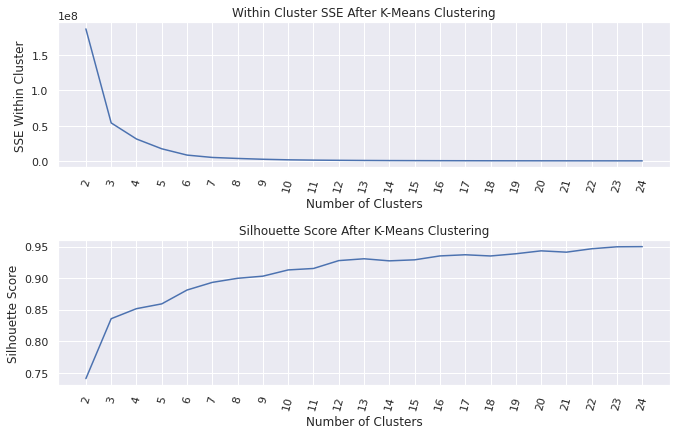

In [ ]:
plot_cluster(final_df, max_loop=25)

In [ ]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,[5,9]]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10, n_jobs=-1)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster.round()))
    
    return df

In [ ]:
first_trial = apply_cluster(final_df, clusters=6)

clustering performance
-----------------------------------
silhouette score: 0.88
sse withing cluster: 8243877.0


In [ ]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"Violent Crime":"mean", "zestimate":"mean"})
    .sort_values('zestimate')
    .reset_index()
)

cluster_perf_df

cluster  Violent Crime      zestimate
0  3        5845.000000    128216.500000
1  1        1003.327586    180758.275862
2  4        3205.000000    201397.942857
3  5        1726.639344    215091.983607
4  2        3973.884058    223632.072464
5  0        2543.128253    240398.738318

In [ ]:
df_sub = final_df.query("cluster == 1").reset_index(drop=True)
df_sub

zipcode  bedrooms  bathrooms  ...  Mortgage+HOA       Profit  cluster
0   52060.0  1.0       1.0        ...  283.214286    543.785714   1      
1   50595.0  2.0       1.0        ...  355.214286    968.579769   1      
2   52101.0  3.0       2.0        ...  518.214286    440.785714   1      
3   50014.0  4.0       4.0        ...  858.214286    767.785714   1      
4   52722.0  2.0       3.0        ...  505.000000    594.000000   1      
5   50401.0  3.0       1.0        ...  367.214286    701.785714   1      
6   51109.0  2.0       1.0        ...  362.214286    462.785714   1      
7   50003.0  2.0       1.0        ...  530.214286    793.579769   1      
8   50010.0  3.0       2.0        ...  612.214286    648.785714   1      
9   52804.0  3.0       2.0        ...  484.214286    729.785714   1      
10  52317.0  3.0       3.0        ...  710.000000    613.794055   1      
11  52240.0  3.0       2.0        ...  670.214286    561.785714   1      
12  52803.0  2.0       1.0        ...  648.082054    675.712001   1      
13  51501.0  3.0       1.0        ...  346.214286    803.785714   1      
14  50595.0  3.0       2.0        ...  420.214286    663.785714   1      
15  50801.0  1.0       1.0        ...  376.214286    622.785714   1      
16  52402.0  3.0       1.0        ...  485.214286    838.579769   1      
17  52402.0  3.0       2.0        ...  525.214286    666.785714   1      
18  50211.0  3.0       3.0        ...  648.082054    675.712001   1      
19  52402.0  2.0       2.0        ...  492.000000    831.794055   1      
20  50322.0  3.0       3.0        ...  712.214286    611.579769   1      
21  52577.0  2.0       1.0        ...  648.082054    185.917946   1      
22  50010.0  4.0       3.0        ...  750.214286    1199.785714  1      
23  52245.0  1.0       1.0        ...  648.082054    546.917946   1      
24  52302.0  4.0       4.0        ...  1292.214286   998.785714   1      
25  51106.0  3.0       2.0        ...  676.214286    621.785714   1      
26  50317.0  2.0       2.0        ...  463.214286    533.785714   1      
27  52240.0  3.0       2.0        ...  771.214286    974.785714   1      
28  52627.0  2.0       1.0        ...  314.214286    373.785714   1      
29  51103.0  2.0       1.0        ...  399.214286    446.785714   1      
30  50320.0  4.0       2.0        ...  591.214286    732.579769   1      
31  50501.0  4.0       1.8        ...  325.214286    1174.785714  1      
32  50112.0  5.0       2.0        ...  984.214286    440.785714   1      
33  52732.0  2.0       1.0        ...  255.214286    515.785714   1      
34  50320.0  4.0       3.0        ...  854.214286    1095.785714  1      
35  50263.0  4.0       3.0        ...  1192.214286   131.579769   1      
36  52402.0  3.0       1.0        ...  527.214286    670.785714   1      
37  50211.0  3.0       2.0        ...  648.082054    675.712001   1      
38  50315.0  2.0       1.0        ...  463.214286    531.785714   1      
39  50317.0  2.0       1.0        ...  394.214286    929.579769   1      
40  52405.0  4.0       1.0        ...  389.214286    760.785714   1      
41  50401.0  2.0       1.8        ...  538.214286    452.785714   1      
42  52804.0  3.0       2.0        ...  825.214286    498.579769   1      
43  50322.0  3.0       2.0        ...  856.214286    467.579769   1      
44  52241.0  4.0       4.0        ...  1531.000000  -499.000000   1      
45  50322.0  3.0       2.0        ...  755.214286    976.785714   1      
46  51503.0  3.0       2.0        ...  489.214286    805.785714   1      
47  52403.0  2.0       1.0        ...  377.214286    419.785714   1      
48  52732.0  3.0       4.0        ...  803.214286    34.785714    1      
49  50126.0  4.0       2.0        ...  453.214286    634.785714   1      
50  52577.0  4.0       2.0        ...  398.214286    532.785714   1      
51  50501.0  4.0       2.2        ...  537.214286    1412.785714  1      
52  50662.0  2.0       1.0        ...  349.214286    375.785714   1      
53  5059

# Logistic Regression

In [ ]:

final_df['Invest_or_Not'] = np.where(final_df['rent_zestimate']> final_df['Mortgage+HOA'], 1, 0)
final_df

zipcode  bedrooms  bathrooms  ...       Profit  cluster  Invest_or_Not
0    52060.0  1.0       1.0        ...  543.785714   1        1            
1    50321.0  4.0       4.0        ...  1260.785714  0        1            
2    50023.0  4.0       3.0        ...  408.794055   0        1            
3    52060.0  3.0       2.0        ...  664.785714   4        1            
4    50054.0  4.0       2.0        ...  851.917946   0        1            
..       ...  ...       ...        ...         ...  ..       ..            
652  52728.0  3.0       1.0        ...  415.785714   0        1            
653  50501.0  3.0       1.8        ...  987.917946   0        1            
654  50613.0  5.0       4.0        ...  1403.000000  0        1            
655  50166.0  2.0       1.0        ...  293.917946   0        1            
656  52594.0  5.0       4.0        ...  533.917946   0        1            

[657 rows x 15 columns]

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 0 to 656
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   zipcode         657 non-null    float64
 1   bedrooms        657 non-null    float64
 2   bathrooms       657 non-null    float64
 3   area            657 non-null    float64
 4   price           657 non-null    float64
 5   zestimate       657 non-null    float64
 6   rent_zestimate  657 non-null    float64
 7   Walk Score      657 non-null    float64
 8   School Rank     657 non-null    float64
 9   Violent Crime   657 non-null    float64
 10  Property Crime  657 non-null    float64
 11  Mortgage+HOA    657 non-null    float64
 12  Profit          657 non-null    float64
 13  cluster         657 non-null    int32  
 14  Invest_or_Not   657 non-null    int64  
dtypes: float64(13), int32(1), int64(1)
memory usage: 79.6 KB


## Train and Split data

Adding features based on feature Importance

In [ ]:
X = final_df[['price','zestimate', 'bathrooms', 'bedrooms', 'area', 'rent_zestimate', 'zipcode']]

Training the model based on target variable 'Invest or Not'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


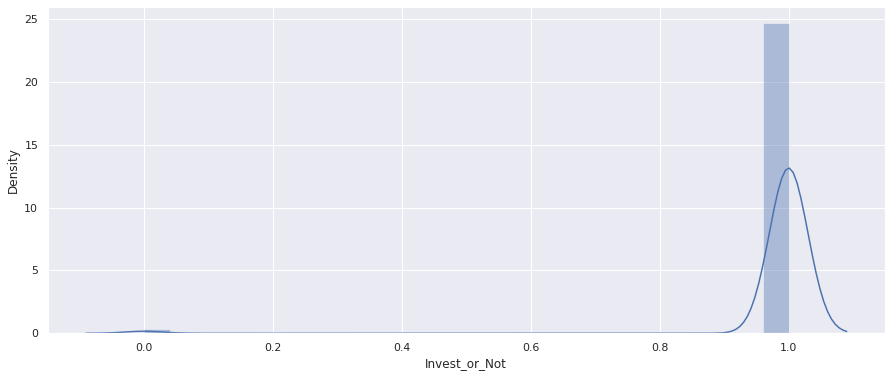

In [ ]:
y = final_df['Invest_or_Not']
plt.figure(figsize=(15,6))
plt.tight_layout()
seabornInstance.distplot(y)

 Splitting 80% of the data to the training set while 20% of the data to test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

## Training the model

In [ ]:
regressor = LogisticRegression(random_state=0)  
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
regressor.score(X_train, y_train)

0.9923809523809524

Prediction on test data :

In [ ]:
y_pred = regressor.predict(X_test)

Difference between the actual value and predicted value :

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(40)
df1.head(30)

Actual  Predicted
268  1       1        
451  1       1        
280  1       1        
125  1       1        
283  1       1        
141  1       1        
308  1       1        
26   1       1        
294  1       1        
145  1       1        
37   1       1        
541  1       1        
58   1       1        
92   1       1        
373  1       1        
324  1       1        
230  1       1        
151  1       1        
153  1       1        
463  1       1        
610  0       1        
559  1       1        
295  1       1        
433  1       1        
468  1       1        
206  1       1        
184  1       1        
276  1       1        
386  1       1        
42   1       1

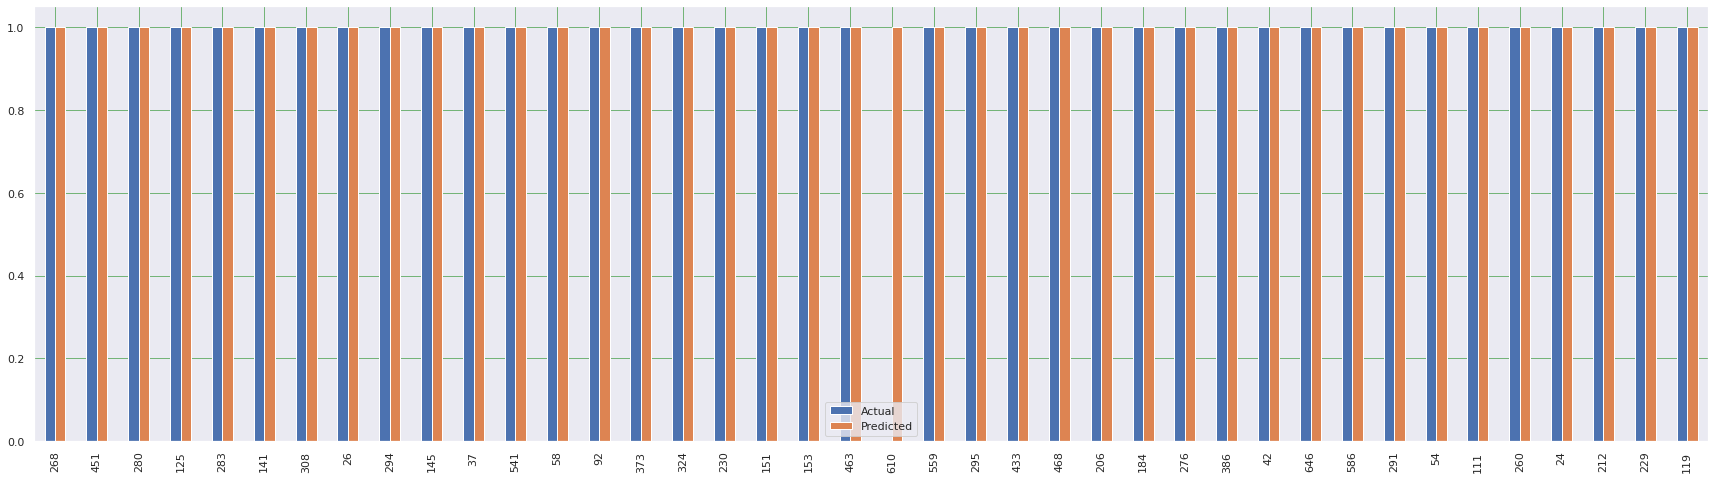

In [ ]:
df1.plot(kind='bar',figsize=(30,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0   2]
 [  0 130]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.98      1.00      0.99       130

    accuracy                           0.98       132
   macro avg       0.49      0.50      0.50       132
weighted avg       0.97      0.98      0.98       132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
score = accuracy_score(y_test, y_pred)
print('\nAccuracy score:', score)


Accuracy score: 0.9848484848484849


In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print('\nMatrix:', matrix)


Matrix: [[  0   2]
 [  0 130]]


In [ ]:

# Plot result from confusion matrix and score
def plot(score, cm):
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  plt.figure(figsize=(9,9))
  sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  all_sample_title = 'Accuracy Score: {:.3f}'.format(score) 
  plt.title(all_sample_title, size = 15);

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   2]
 [  0 130]]


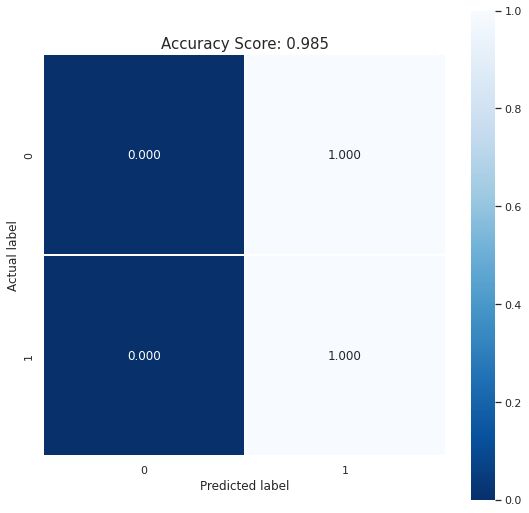

In [ ]:
plot(score, cm)

# Applying Muller Loop

In [ ]:
final_df['Invest_or_Not'] = np.where(final_df['rent_zestimate']> final_df['Mortgage+HOA'], 1, 0)
final_df

zipcode  bedrooms  bathrooms  ...       Profit  cluster  Invest_or_Not
0    52060.0  1.0       1.0        ...  543.785714   1        1            
1    50321.0  4.0       4.0        ...  1260.785714  0        1            
2    50023.0  4.0       3.0        ...  408.794055   0        1            
3    52060.0  3.0       2.0        ...  664.785714   4        1            
4    50054.0  4.0       2.0        ...  851.917946   0        1            
..       ...  ...       ...        ...         ...  ..       ..            
652  52728.0  3.0       1.0        ...  415.785714   0        1            
653  50501.0  3.0       1.8        ...  987.917946   0        1            
654  50613.0  5.0       4.0        ...  1403.000000  0        1            
655  50166.0  2.0       1.0        ...  293.917946   0        1            
656  52594.0  5.0       4.0        ...  533.917946   0        1            

[657 rows x 15 columns]

In [ ]:
final_df.drop(['School Rank','Violent Crime','Property Crime'],axis=1,inplace=True)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 0 to 656
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   zipcode         657 non-null    float64
 1   bedrooms        657 non-null    float64
 2   bathrooms       657 non-null    float64
 3   area            657 non-null    float64
 4   price           657 non-null    float64
 5   zestimate       657 non-null    float64
 6   rent_zestimate  657 non-null    float64
 7   Walk Score      657 non-null    float64
 8   Mortgage+HOA    657 non-null    float64
 9   Profit          657 non-null    float64
 10  cluster         657 non-null    int32  
 11  Invest_or_Not   657 non-null    int64  
dtypes: float64(10), int32(1), int64(1)
memory usage: 64.2 KB


## Train and Split data

In [ ]:
X = final_df[['price','zestimate', 'bathrooms', 'bedrooms', 'area', 'rent_zestimate', 'zipcode']]
y = final_df['Invest_or_Not']

## Apply Algorithms in Loop

In [ ]:
def apply(X, _regr):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

  print('y_train dist\n', y_train.value_counts())
  print('y_test dist\n', y_test.value_counts())

  # Train the model using the training sets
  model = _regr.fit(X_train, y_train)

  # Make predictions using the testing set
  y_pred = _regr.predict(X_test)

  
  unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
  frequencies = np.asarray((unique_elements, counts_elements)).T

  print('y_pred distribution')
  print(frequencies)
  
  return y_test, y_pred, model

In [ ]:
from sklearn.svm import SVR
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import f1_score

In [ ]:
from sklearn.metrics import r2_score
def muellerregresssorloop(data,feat):


  kernel = DotProduct() + WhiteKernel()
  names = ["GradientBoostingRegressor","RandomForestRegressor","LinearRegression","SVR","DecisionTreeRegressor","AdaBoostRegressor","GaussianProcessRegressor", "LogisticRegressor"]
  regressors = [GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.01, max_features = feat, max_depth = 5, random_state= 42), RandomForestRegressor(n_estimators=200, max_depth=7,max_features=feat, random_state= 42), LinearRegression(), SVR(kernel='rbf', gamma='auto'), DecisionTreeRegressor(random_state = 0), AdaBoostRegressor(random_state=0, n_estimators=100), GaussianProcessRegressor(kernel=kernel,random_state=0), LogisticRegression()]
 

  X =  StandardScaler().fit_transform(data.drop(columns ='Invest_or_Not'))
  y = data['Invest_or_Not'].values

  X_train, X_test, y_train, y_test = \
      train_test_split(X, y, test_size=.2)



  max_score = 0.0
  max_class = ''
  # iterate over regressors
  for name, clf in zip(names, regressors):
      clf.fit(X_train, y_train)
      score = 100.0 * clf.score(X_test, y_test)
      pred = clf.predict(X_train)
      r2 = r2_score(y_train, pred)
      print('R2 SCORE = %.2f,' %(r2))
      print('regressors = %s, Score (test, accuracy) = %.2f,' %(name, score))
      
      if score > max_score:
          reg_best = clf
          max_score = score
          max_class = name

  print(80*'-' )
  print('Best --> regressors = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))


In [ ]:
feat=7
muellerregresssorloop(final_df,feat)


R2 SCORE = 1.00,
regressors = GradientBoostingRegressor, Score (test, accuracy) = 99.98,
R2 SCORE = 0.99,
regressors = RandomForestRegressor, Score (test, accuracy) = 99.73,
R2 SCORE = 0.31,
regressors = LinearRegression, Score (test, accuracy) = 2.78,
R2 SCORE = 0.71,
regressors = SVR, Score (test, accuracy) = 36.73,
R2 SCORE = 1.00,
regressors = DecisionTreeRegressor, Score (test, accuracy) = 100.00,
R2 SCORE = 1.00,
regressors = AdaBoostRegressor, Score (test, accuracy) = 100.00,
R2 SCORE = 0.31,
regressors = GaussianProcessRegressor, Score (test, accuracy) = 2.78,
R2 SCORE = 0.86,
regressors = LogisticRegressor, Score (test, accuracy) = 99.24,
--------------------------------------------------------------------------------
Best --> regressors = DecisionTreeRegressor, Score (test, accuracy) = 100.00


In [ ]:
def mullerclassifierloop(data):


  names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
          "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
          "Naive Bayes", "QDA"]

  classifiers = [
      KNeighborsClassifier(2),
      SVC(kernel="linear", C=0.025),
      SVC(gamma=2, C=1),
  
      DecisionTreeClassifier(max_depth=5),
      RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
      MLPClassifier(alpha=1, max_iter=1000),
      AdaBoostClassifier(),
      GaussianNB(),
      QuadraticDiscriminantAnalysis()]

  X =  StandardScaler().fit_transform(data.drop(columns ='Invest_or_Not'))
  y = data['Invest_or_Not'].values

  X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2)


  max_score = 0.0
  max_class = ''
  # iterate over classifiers
  for name, clf in zip(names, classifiers):
      clf.fit(X_train, y_train)
      score = 100.0 * clf.score(X_test, y_test)
      pred = clf.predict(X_train)
      # F1 Score matrix
      f1 = f1_score(y_train, pred, average='macro')
      print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score))
      print('F1 SCORE = %.2f,' %(f1))
      fig, ax = plt.subplots()
      #Confusion matrix
      cm = ConfusionMatrix(clf, classes=[0, 1], ax=ax)
      cm.fit(X_train, y_train)
      cm.score(X_test, y_test)
      cm.poof()


      if score > max_score:
          clf_best = clf
          max_score = score
          max_class = name

  print(80*'-' )
  print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
  print(80*'-' )
  #plot the output of the various algorithms

Classifier = Nearest Neighbors, Score (test, accuracy) = 100.00,
F1 SCORE = 0.90,


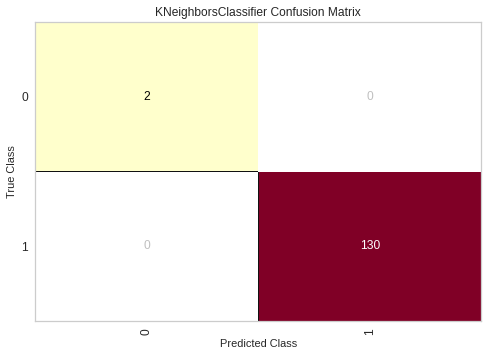

Classifier = Linear SVM, Score (test, accuracy) = 98.48,
F1 SCORE = 0.75,


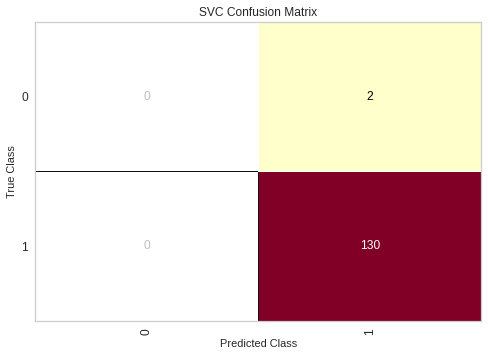

Classifier = RBF SVM, Score (test, accuracy) = 98.48,
F1 SCORE = 1.00,


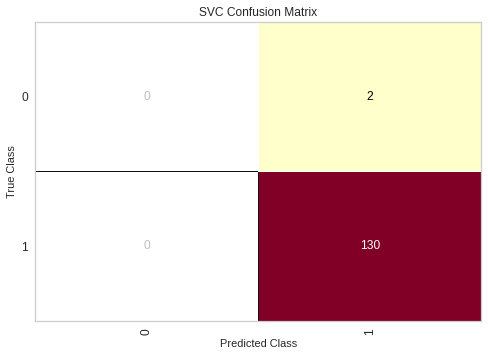

Classifier = Decision Tree, Score (test, accuracy) = 100.00,
F1 SCORE = 1.00,


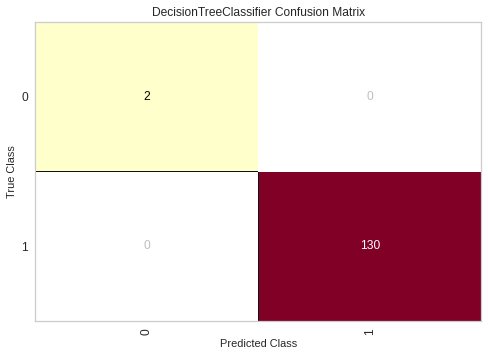

Classifier = Random Forest, Score (test, accuracy) = 99.24,
F1 SCORE = 1.00,


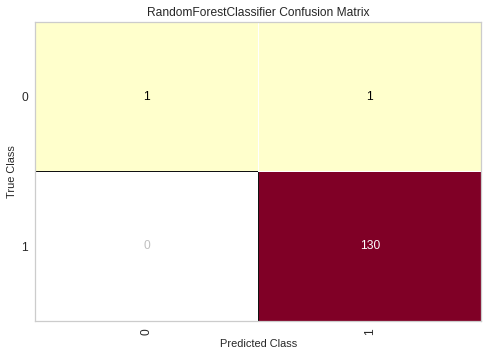

Classifier = Neural Net, Score (test, accuracy) = 99.24,
F1 SCORE = 0.95,


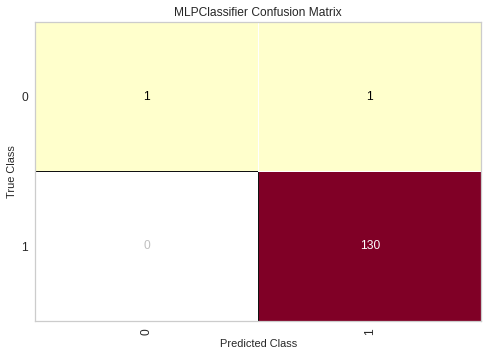

Classifier = AdaBoost, Score (test, accuracy) = 100.00,
F1 SCORE = 1.00,


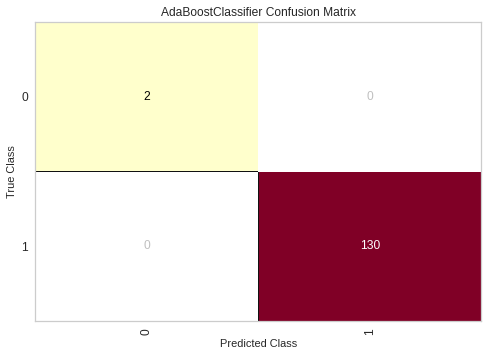

Classifier = Naive Bayes, Score (test, accuracy) = 98.48,
F1 SCORE = 0.75,


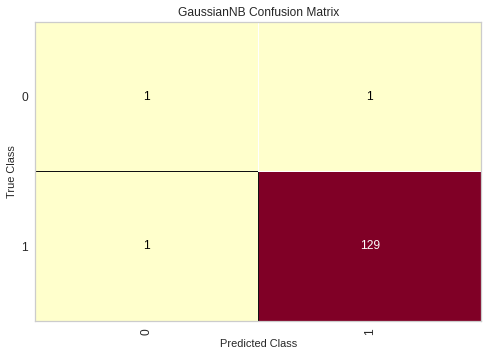

Classifier = QDA, Score (test, accuracy) = 98.48,
F1 SCORE = 0.90,


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


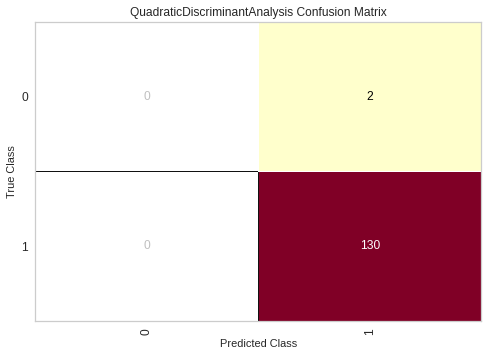

--------------------------------------------------------------------------------
Best --> Classifier = Nearest Neighbors, Score (test, accuracy) = 100.00
--------------------------------------------------------------------------------


In [ ]:
mullerclassifierloop(final_df)

# Pickle and load the best classifier


## The Best Model




In [ ]:
file = open('final-model', 'wb')
pickle.dump(clf_best, file)
file.close()

In [ ]:
file = open('final-model', 'rb')
best_clf = pickle.load(file)
y_pred = best_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0   2]
 [  1 129]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.98      0.99      0.99       130

    accuracy                           0.98       132
   macro avg       0.49      0.50      0.49       132
weighted avg       0.97      0.98      0.97       132



In [ ]:
score = accuracy_score(y_test, y_pred)
print('\nAccuracy score:', score)


Accuracy score: 0.9772727272727273


# Confusion Matrix

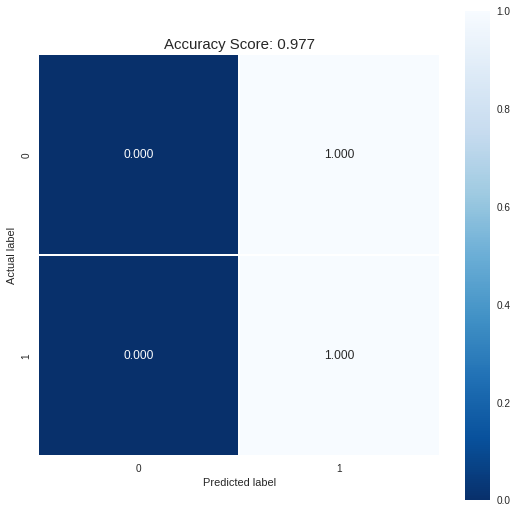

In [ ]:
plot(score, cm)

# Variance

### Check variance in prediction quality

In [ ]:
scores = cross_val_score(best_clf, X, y, cv=RepeatedKFold(n_repeats=CV_N_REPEATS), n_jobs=-1)
scores_est = scores.copy()
print("Scores mean={scores.mean():0.2f} +/- {scores.std():0.2f} (1 s.d.)")

Scores mean=0.99 +/- 0.01 (1 s.d.)


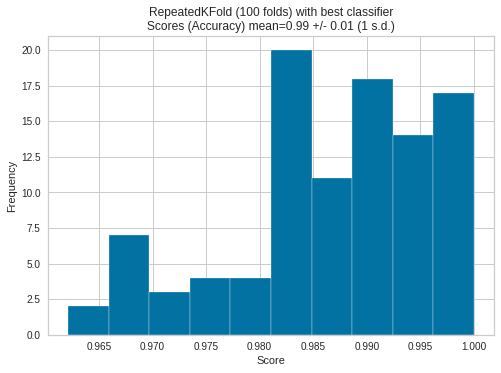

In [ ]:
score_line = "Scores (Accuracy) mean={scores.mean():0.2f} +/- {scores.std():0.2f} (1 s.d.)"
fig, ax = plt.subplots()
pd.Series(scores).hist(ax=ax, bins=BINS)
ax.set_title("RepeatedKFold ({len(scores)} folds) with best classifier\n" + score_line);
ax.set_xlabel("Score")
ax.set_ylabel("Frequency");

# Summary

**Business Case** is to provide knowledge to an buyer, whether to invest on an porperty or not. This decison has to be taken by considering various features such as, Selling Price of the property, Zestimate Price, Proximity to various school, crime rate, 

1. **Datset**: Using IA dataset given by the professor I performed data cleaning and took only the required features such as, Address, ZipCode, Bedroomss, bathrooms, area, price,rent

2. **Web Scraping**: Scraping of data was performed from various websites as below:
  * Zillow: https://www.zillow.com
  * Walk Score: https://www.walkscore.com
  * School Proximity Rank: https://www.niche.com/places-to-live/z/
  * Crime rates: https://247wallst.com/city/  

***First Data Enrichment*** by mering Zillow data into the Housing dataset. 
***Second Data Enrichment***  performed by applying walk score to Housing dataset.  
***Third Data Enrichment*** to Housing Dataset by school rank .  
 ***Fourth Data Enrichment***.
performed based on crime rate


3. **Feature Transformation**:Cleaned the final dataset, perfomred feature transformation by checking null values, removing duplicates.

4. **Feature Importance**: With the help of Correlation Coefficient Heatmap and gini score got  Price, Mortgage+HOA,  area, rent_zestimate, ZipCode and, WalkScore as the most important features from the final dataset.

5. **Clustering** : Performed k-means clustering and found the Golden cluster as 2

6. **Latent Variables**: 
  * walk score
  * crime rate 
  * school rank 
  * rent_zestimate  


7. **Muller Loop**: Performed Muller Loop to get the best classifier for 5 classifiers and got Nearest Neighbors as. the best classifier
Performed regreesion with 7 algorithms and got DecissionTreeRegressor algo best for the given dataset. 